In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import time

from math import sqrt

In [2]:
def putpixel(data, x, y, color, alpha=1.0):
    #print(x, y)
    x = int(x)
    y = int(y)
    bg = data [y][x]
    if(alpha>1.0):
        alpha=1.
    color2 = [0.0, 0.0 ,0.0 ]
    color2[0] = alpha * color[0] + (1.0 - alpha) *bg[0]
    color2[1] = alpha * color[1] + (1.0 - alpha) *bg[1]
    color2[2] = alpha * color[2] + (1.0 - alpha) *bg[2]
    data[y, x] = color2


def lineAntiAliasing(x1, y1, x2, y2):
    RGB = np.zeros((200, 200, 3), dtype = np.uint8)
    RGB.fill(255)
    A = y2-y1
    B = x1-x2
    C = x1*y2-x1*y2
    Z = sqrt(A * A + B * B)
    for x in range(min(x1, x2) - 1, max(x1, x2) + 2):
        for y in range(min(y1, y2) - 1, max(y1, y2) + 2):
            d = abs(A * x + B * y + C) / Z
            if d<1:
                RGB [y, x] = 255 * d
                #putpixel(RGB, x, y, [255, 0, 0], (1 - d))
    return RGB

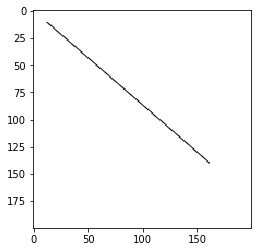

In [3]:
data1=lineAntiAliasing(12, 12, 160, 140)

plt.imshow(data1, interpolation='none')

plt.imsave('line_simpleA.png', data1, format='png')

In [4]:
def lineS(x1, y1, x2, y2):
    RGB = np.zeros((200, 200, 3), dtype=np.uint8)
    RGB.fill(255)
    if (x1 == x2 and y1 == y2):
        RGB[x1, y1] = 0
        return RGB
    if abs(x2 - x1) > abs(y2 - x1):
        if x2 < x1:
            x1, x2 = x2, x1
            y1, y2 = y2, y1
        a = (y2 - y1)/(x2-x1)
        for x in range(x1, x2+1):
            y = y1 + a*(x-x1)
            RGB[int(y), x] = 0
    else:   
        if y2 < y1:
            x1, x2 = x2, x1
            y1, y2 = y2, y1
        a = (x2 - x1)/(y2-y1)
        for y in range(y1, y2+1):
            x = x1 + a*(y-y1)
            RGB[y, int(x)] = 0
    return RGB

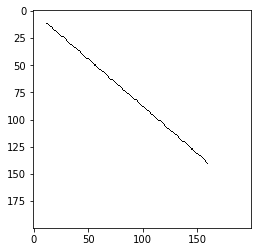

In [5]:
data2=lineS(12, 12, 160, 140)

plt.imshow(data2, interpolation='none')

plt.imsave('line_noA.png', data2, format='png')

In [6]:
def _fpart(x):
    return x - int(x)
 
def _rfpart(x):
    return 1.0 - _fpart(x)
 
def _round(x):
    return int(np.floor(x+0.5))

def lineXW(x1, y1, x2, y2):
    RGB=np.zeros((200, 200, 3), dtype = np.uint8)
    RGB.fill(255)
    
    dx, dy = x2-x1, y2-y1
    steep = abs(dx) < abs(dy)
    
    
    if steep:
        x1, y1, x2, y2 = y1, x1, y2, x2
    if x2 < x1:
        x1, x2, y1, y2 = x2, x1, y2, y1
    dx, dy = x2-x1, y2-y1
    gradient = dy/dx
    #intery = y1 + _rfpart(x1) * gradient
    
    xend = _round(x1)
    yend = y1 + gradient * (xend - x1)
    
    xgap = _rfpart(x1 + 0.5)
    xpxl1 = xend 
    ypxl1 = int(np.floor(yend))
    
    if steep:
        #putpixel(data, ypxl1,   xpxl1, colorl, _rfpart(yend) * xgap)
        RGB[xpxl1, ypxl1,] = 255 * (1 - _rfpart(yend) * xgap)     
        #putpixel(data, ypxl1+1, xpxl1, colorl, _fpart(yend) * xgap)
        RGB[xpxl1, ypxl1 + 1,] = 255 * (1 - _fpart(yend) * xgap)
        
    else:
        #putpixel(data, xpxl1, ypxl1, colorl, _rfpart(yend) * xgap)
        RGB[ypxl1, xpxl1] = 255 * (1 - _rfpart(yend) * xgap)      
        #putpixel(data, xpxl1, ypxl1+1,  colorl, _fpart(yend) * xgap)
        RGB[ypxl1 + 1, xpxl1] = 255 * (1 - _fpart(yend) * xgap)
    intery = yend + gradient
    xend = _round(x2)
    yend = y2 + gradient * (xend - x2)
    xgap = _fpart(x2 + 0.5)
    xpxl2 = xend 
    ypxl2 = int(np.floor(yend))
    
    if steep:
        RGB[xpxl2, ypxl2] = 255 * (1 - _rfpart(yend) * xgap)
        RGB[xpxl2, ypxl2 + 1,] = 255 * (1 - _fpart(yend) * xgap)
    else:
        RGB[ypxl2, xpxl2] = 255 * (1 - _rfpart(yend) * xgap)
        RGB[ypxl2 + 1, xpxl2] = 255 * (1 - _fpart(yend) * xgap)

    if steep:
        for x in range( xpxl1 + 1, xpxl2):
            RGB[x, int(np.floor(intery))] = 255 * (1 -_rfpart(intery) * xgap)
            RGB[x, int(np.floor(intery))+1] = 255 * (1 - _fpart(intery) * xgap)
            intery = intery + gradient
        
    else:
        for x in range (xpxl1 + 1, xpxl2):
            RGB[int(np.floor(intery)), x] = 255 * (1 -_rfpart(intery) * xgap)
            RGB[int(np.floor(intery))+1, x] = 255 * (1 - _fpart(intery) * xgap)
            intery = intery + gradient
    
    return RGB

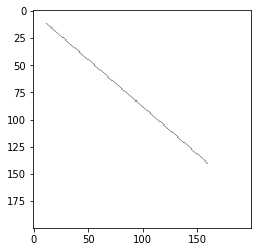

In [7]:
data3 = lineXW(12, 12, 160, 140)

plt.imshow(data3, interpolation='none')

plt.imsave('line_XW_bw.png', data3, format='png')

In [8]:
# zad. 1 - porownanie lineAntiAliasing, lineS, lineXW

wyniki_lineAntiAliasing = []
wyniki_lineS = []
wyniki_lineXW = []

for proba in range(1000):
    x0, y0 = random.randint(0, 99), random.randint(0, 99)
    xk, yk = random.randint(0, 99), random.randint(0, 99)
    #print(x0, y0, xk, yk)
    
    try:
        start1 = time.time()
        lineAntiAliasing(x0, y0, xk, yk)
        end1 = time.time()
        wynik1 = end1 - start1

        start2 = time.time()
        lineS(x0, y0, xk, yk)
        end2 = time.time()
        wynik2 = end2 - start2

        start3 = time.time()
        lineXW(x0, y0, xk, yk)
        end3 = time.time()
        wynik3 = end3 - start3 

    except ZeroDivisionError:
        continue
   
    wyniki_lineAntiAliasing.append(wynik1)
    wyniki_lineS.append(wynik2)
    wyniki_lineXW.append(wynik3)

    
print("laa:", np.mean(wyniki_lineAntiAliasing))
print("s:", np.mean(wyniki_lineS))
print("xw:", np.mean(wyniki_lineXW))

laa: 0.00036049392861379706
s: 4.345742269780794e-05
xw: 0.0002040894218613684
